In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import random 
import torch
import os 
from torch.utils.data import Dataset, DataLoader

In [2]:
paths = []
labels = []
audio_files = ["Audio_Speech_Actors_01-24", "Audio_Song_Actors_01-24"]
for main_file in audio_files:
    for actor in os.listdir(main_file):
        actor_path = os.path.join(main_file,actor)
        for audio in os.listdir(actor_path):
            if audio.endswith(".wav"):
                path = os.path.join(actor_path, audio)
                paths.append(path)
                emotion = int(audio.split("-")[2])
                labels.append(emotion)


In [3]:
print("Length of paths: ",len(paths))
print("Length of labels: ",len(labels))
print("Maximum label: ",max(labels))
print("Minimum label: ",min(labels))
print("Data type of paths: ",type(paths[0]))
print("Data type of lables: ",type(labels[0]))


Length of paths:  2452
Length of labels:  2452
Maximum label:  8
Minimum label:  1
Data type of paths:  <class 'str'>
Data type of lables:  <class 'int'>


In [4]:
data = list(zip(paths, labels))
seed = random.Random(42)
seed.shuffle(data)
data[:5]

[('Audio_Song_Actors_01-24\\Actor_24\\03-02-03-02-02-01-24.wav', 3),
 ('Audio_Song_Actors_01-24\\Actor_02\\03-02-03-02-02-02-02.wav', 3),
 ('Audio_Speech_Actors_01-24\\Actor_14\\03-01-03-01-02-01-14.wav', 3),
 ('Audio_Speech_Actors_01-24\\Actor_17\\03-01-07-01-02-01-17.wav', 7),
 ('Audio_Song_Actors_01-24\\Actor_06\\03-02-06-01-02-01-06.wav', 6)]

In [5]:
df_combined = pd.DataFrame(data, columns=["path","label"])
df_combined.head()


,path,label
0,Audio_Song_Actors_01-24\Actor_24\03-02-03-02-0...,3
1,Audio_Song_Actors_01-24\Actor_02\03-02-03-02-0...,3
2,Audio_Speech_Actors_01-24\Actor_14\03-01-03-01...,3
3,Audio_Speech_Actors_01-24\Actor_17\03-01-07-01...,7
4,Audio_Song_Actors_01-24\Actor_06\03-02-06-01-0...,6


In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2452 non-null   object
 1   label   2452 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.4+ KB


In [7]:
df_combined.describe()

,label
count,2452.000000
mean,4.318108
std,2.020284
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,8.000000


In [8]:
df_combined.loc[0]

path     Audio_Song_Actors_01-24\Actor_24\03-02-03-02-0...
label                                                    3
Name: 0, dtype: object

In [9]:
from pathlib import Path
df_combined["path"] = df_combined["path"].str.replace("\\", "/", regex=False)


In [10]:
df_combined.head()

,path,label
0,Audio_Song_Actors_01-24/Actor_24/03-02-03-02-0...,3
1,Audio_Song_Actors_01-24/Actor_02/03-02-03-02-0...,3
2,Audio_Speech_Actors_01-24/Actor_14/03-01-03-01...,3
3,Audio_Speech_Actors_01-24/Actor_17/03-01-07-01...,7
4,Audio_Song_Actors_01-24/Actor_06/03-02-06-01-0...,6


In [11]:
df_combined["label"] = df_combined["label"].apply(lambda x: x-1)
print("minimum label value: ", df_combined["label"].min())
print("maximum label value: ", df_combined["label"].max())

minimum label value:  0
maximum label value:  7


In [12]:
training_data, validation_data = train_test_split(df_combined, test_size=0.2, random_state=32)

In [13]:
training_data.head()

,path,label
2138,Audio_Speech_Actors_01-24/Actor_08/03-01-08-01...,7
623,Audio_Speech_Actors_01-24/Actor_05/03-01-01-01...,0
1942,Audio_Song_Actors_01-24/Actor_15/03-02-03-02-0...,2
1331,Audio_Speech_Actors_01-24/Actor_05/03-01-08-02...,7
401,Audio_Speech_Actors_01-24/Actor_20/03-01-02-02...,1


In [14]:
validation_data.head()

,path,label
1794,Audio_Speech_Actors_01-24/Actor_16/03-01-08-02...,7
1833,Audio_Speech_Actors_01-24/Actor_20/03-01-08-02...,7
1488,Audio_Song_Actors_01-24/Actor_17/03-02-05-02-0...,4
2267,Audio_Song_Actors_01-24/Actor_24/03-02-04-01-0...,3
290,Audio_Speech_Actors_01-24/Actor_13/03-01-04-02...,3


In [ ]:
print("Length of Training Data: ", len(training_data))
print("Length of Validation Data: ", len(validation_data))

Length of Training Data:  1961
Length of Validation Data:  491


In [16]:
import soundfile as sf 
import torchaudio
import librosa
waveform, sr = sf.read(training_data.loc[0,"path"])
print((waveform.shape),sr)
waveform, sr = librosa.load(training_data.loc[0,"path"], sr=16000)
print(waveform.shape, sr)

(237037,) 48000
(79013,) 16000


In [17]:
max_duration = 0
longest_file = ""
for path in df_combined['path']:
    # full_path = os.path.join(base_dir, path)
    if os.path.isfile(path):
        waveform, sample_rate = librosa.load(path, sr=16000)
        duration = waveform.shape[0] / sample_rate
        if duration > max_duration:
            max_duration = duration
            longest_file = path
    else:
        print(f"one file path is not available {path}")
        break

print(f"Max duration: {max_duration:.8f} seconds")
print(f"sample rate: {sample_rate:.2f}")
print(f"Longest file: {longest_file}")

Max duration: 6.37306250 seconds
sample rate: 16000.00
Longest file: Audio_Song_Actors_01-24/Actor_22/03-02-02-02-02-01-22.wav


In [18]:
waveform, sr = librosa.load("Audio_Song_Actors_01-24/Actor_22/03-02-02-02-02-01-22.wav", sr =16000)
print(waveform.shape, sr)

(101969,) 16000


In [19]:
from collections import Counter
sample_rates = []
for full_path in df_combined['path']:
    # full_path = os.path.join(base_dir, path)
    if os.path.isfile(full_path):
        _, sr = librosa.load(full_path, sr=16000)
        sample_rates.append(sr)

# Count frequency of each sample rate
rate_counts = Counter(sample_rates)
print(rate_counts)

Counter({16000: 2452})


In [20]:
class AudioDataset(Dataset):
    def __init__(self, data, processor, max_length= int(6.37306250*16000)):
        self.data = data
        self.processor = processor
        self.max_length = max_length
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        audio_path = self.data.iloc[index]["path"]
        label = self.data.iloc[index]["label"]

        audio, sr = librosa.load(audio_path)
        audio = audio.squeeze()

        if len(audio) > self.max_length :
            audio = audio[:self.max_length]
            # print(f"found a audio file greater than max length : {audio_path} with an audio length {len(audio)}")
        else:
            audio = np.pad(audio, (0,int(self.max_length-len(audio))), "constant")
            
        inputs = self.processor(audio, sampling_rate=16000, return_tensors='pt', padding=True, truncate=True, max_length=self.max_length)
        input_values = inputs.input_values.squeeze()

        return {'input_values': input_values, 'labels': torch.tensor(label, dtype=torch.long)}

    

In [21]:
import torch
print(torch.__version__)


2.5.1+cu121


In [22]:
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Wav2Vec2ForSequenceClassification, Wav2Vec2Config, Trainer, TrainingArguments, Wav2Vec2FeatureExtractor
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/wav2vec2-base", num_labels=8)
processor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base")

c:\Users\akhilesh\.conda\envs\akhilesh-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\akhilesh\.conda\envs\akhilesh-env\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\akhilesh\.conda\envs\akhilesh-env\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Fo

In [23]:
train_dataset = AudioDataset(training_data, processor)
validation_dataset = AudioDataset(validation_data, processor)

In [24]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=8, shuffle=False)

In [25]:
from transformers.utils import logging
logging.set_verbosity_info()

In [26]:
from transformers import __version__
print(__version__)


4.39.3


In [27]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir="./wav2vec2-base",
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    metric_for_best_model="eval_accuracy",
    save_total_limit=10,
    logging_dir="./wav2vec2-base",
    greater_is_better=True,
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
    weight_decay=0.01,
    num_train_epochs=24,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def get_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, fscore, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'fscore':fscore
    }

In [29]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [30]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=get_metrics
)


c:\Users\akhilesh\.conda\envs\akhilesh-env\Lib\site-packages\accelerate\accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [31]:
trainer.train(resume_from_checkpoint="D:\Akhilesh-VS-Code\Speech-Classification\wav2vec2-base\wav2vec2-base\checkpoint-2337")

Loading model from D:\Akhilesh-VS-Code\Speech-Classification\wav2vec2-base\wav2vec2-base\checkpoint-2337.
c:\Users\akhilesh\.conda\envs\akhilesh-env\Lib\site-packages\transformers\trainer.py:2854: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an i

{'loss': 0.1726, 'grad_norm': 1.1870707273483276, 'learning_rate': 3.3333333333333333e-06, 'epoch': 20.0}


                                                   
 83%|████████▎ | 2460/2952 [04:49<16:23,  2.00s/it]Saving model checkpoint to ./wav2vec2-base\checkpoint-2460
Configuration saved in ./wav2vec2-base\checkpoint-2460\config.json


{'eval_loss': 0.6018542647361755, 'eval_accuracy': 0.835030549898167, 'eval_precision': 0.839771062808118, 'eval_recall': 0.835030549898167, 'eval_fscore': 0.8359573858219862, 'eval_runtime': 20.6705, 'eval_samples_per_second': 23.754, 'eval_steps_per_second': 2.999, 'epoch': 20.0}


Model weights saved in ./wav2vec2-base\checkpoint-2460\model.safetensors
 88%|████████▊ | 2583/2952 [09:24<12:11,  1.98s/it]  ***** Running Evaluation *****
  Num examples = 491
  Batch size = 8


{'loss': 0.1516, 'grad_norm': 2.4859869480133057, 'learning_rate': 2.5e-06, 'epoch': 21.0}


                                                   
 88%|████████▊ | 2583/2952 [09:44<12:11,  1.98s/it]Saving model checkpoint to ./wav2vec2-base\checkpoint-2583
Configuration saved in ./wav2vec2-base\checkpoint-2583\config.json


{'eval_loss': 0.6025500297546387, 'eval_accuracy': 0.8391038696537678, 'eval_precision': 0.8461639121732001, 'eval_recall': 0.8391038696537678, 'eval_fscore': 0.8393261138080723, 'eval_runtime': 20.5796, 'eval_samples_per_second': 23.859, 'eval_steps_per_second': 3.013, 'epoch': 21.0}


Model weights saved in ./wav2vec2-base\checkpoint-2583\model.safetensors
 92%|█████████▏| 2706/2952 [14:20<08:02,  1.96s/it]***** Running Evaluation *****
  Num examples = 491
  Batch size = 8


{'loss': 0.118, 'grad_norm': 1.0534390211105347, 'learning_rate': 1.6666666666666667e-06, 'epoch': 22.0}


                                                   
 92%|█████████▏| 2706/2952 [14:40<08:02,  1.96s/it]Saving model checkpoint to ./wav2vec2-base\checkpoint-2706
Configuration saved in ./wav2vec2-base\checkpoint-2706\config.json


{'eval_loss': 0.6406895518302917, 'eval_accuracy': 0.8370672097759674, 'eval_precision': 0.8420279453352211, 'eval_recall': 0.8370672097759674, 'eval_fscore': 0.8372998025919777, 'eval_runtime': 20.6591, 'eval_samples_per_second': 23.767, 'eval_steps_per_second': 3.001, 'epoch': 22.0}


Model weights saved in ./wav2vec2-base\checkpoint-2706\model.safetensors
 96%|█████████▌| 2829/2952 [19:14<04:02,  1.97s/it]***** Running Evaluation *****
  Num examples = 491
  Batch size = 8


{'loss': 0.1091, 'grad_norm': 1.2055245637893677, 'learning_rate': 8.333333333333333e-07, 'epoch': 23.0}


                                                   
 96%|█████████▌| 2829/2952 [19:35<04:02,  1.97s/it]Saving model checkpoint to ./wav2vec2-base\checkpoint-2829
Configuration saved in ./wav2vec2-base\checkpoint-2829\config.json


{'eval_loss': 0.6420020461082458, 'eval_accuracy': 0.8391038696537678, 'eval_precision': 0.844827466887181, 'eval_recall': 0.8391038696537678, 'eval_fscore': 0.8379128567540668, 'eval_runtime': 20.7746, 'eval_samples_per_second': 23.635, 'eval_steps_per_second': 2.984, 'epoch': 23.0}


Model weights saved in ./wav2vec2-base\checkpoint-2829\model.safetensors
100%|██████████| 2952/2952 [24:09<00:00,  1.96s/it]***** Running Evaluation *****
  Num examples = 491
  Batch size = 8


{'loss': 0.103, 'grad_norm': 0.6538347005844116, 'learning_rate': 0.0, 'epoch': 24.0}


                                                   
100%|██████████| 2952/2952 [24:30<00:00,  1.96s/it]Saving model checkpoint to ./wav2vec2-base\checkpoint-2952
Configuration saved in ./wav2vec2-base\checkpoint-2952\config.json


{'eval_loss': 0.6416063904762268, 'eval_accuracy': 0.8472505091649695, 'eval_precision': 0.852073173143245, 'eval_recall': 0.8472505091649695, 'eval_fscore': 0.8475203306498549, 'eval_runtime': 20.6251, 'eval_samples_per_second': 23.806, 'eval_steps_per_second': 3.006, 'epoch': 24.0}


Model weights saved in ./wav2vec2-base\checkpoint-2952\model.safetensors


Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 2952/2952 [24:32<00:00,  2.01it/s]

{'train_runtime': 1472.233, 'train_samples_per_second': 31.968, 'train_steps_per_second': 2.005, 'train_loss': 0.02726386459216193, 'epoch': 24.0}


TrainOutput(global_step=2952, training_loss=0.02726386459216193, metrics={'train_runtime': 1472.233, 'train_samples_per_second': 31.968, 'train_steps_per_second': 2.005, 'train_loss': 0.02726386459216193, 'epoch': 24.0})

## Graphs

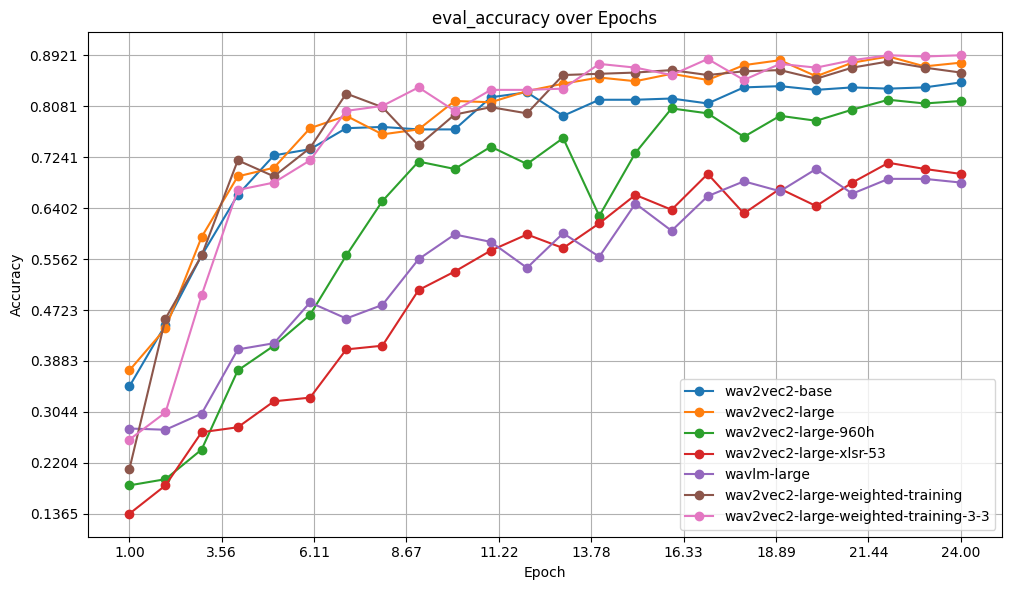

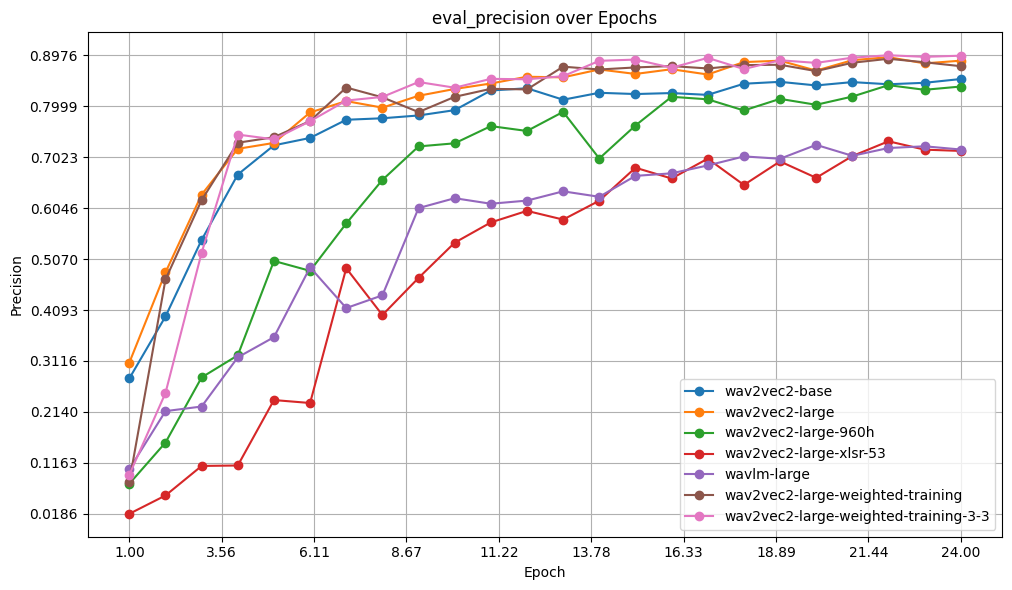

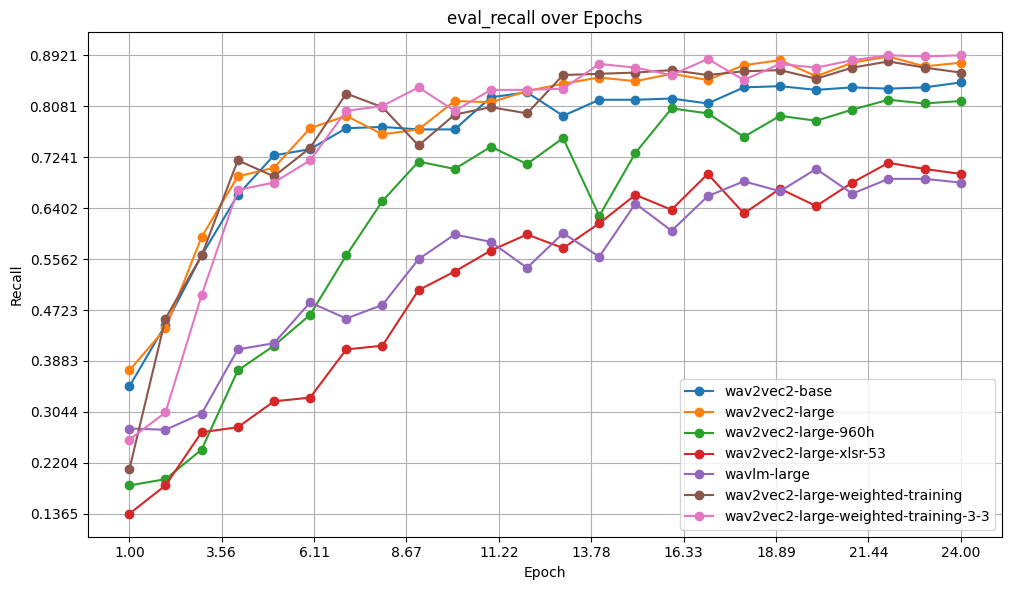

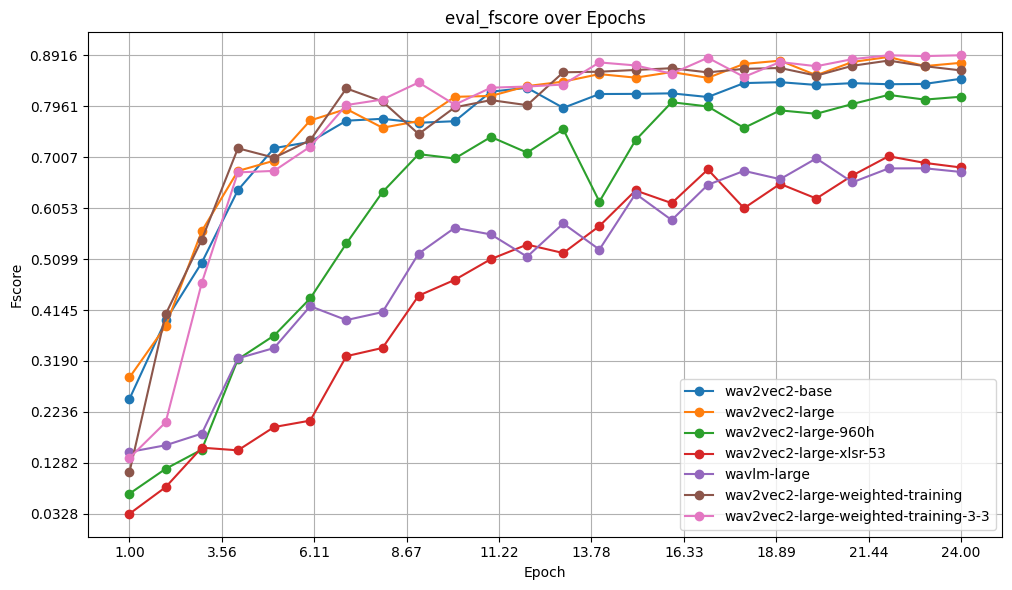

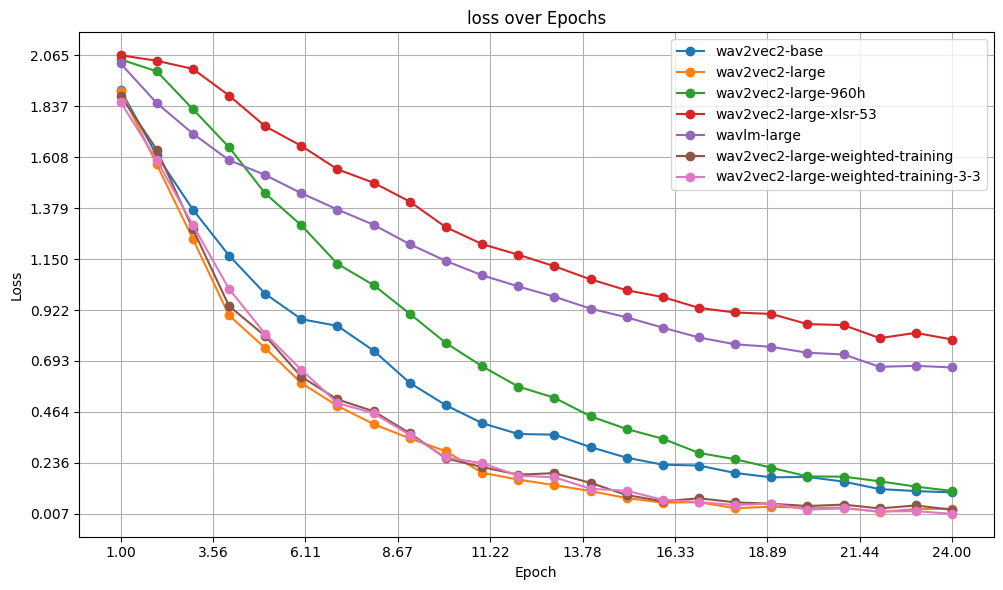

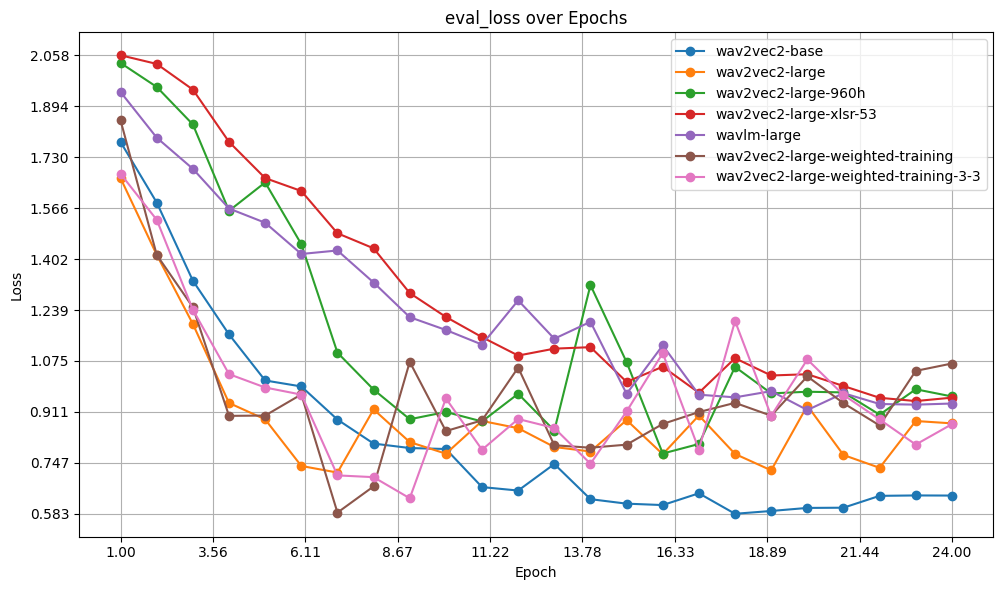

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np 

# List of JSON file paths
json_files = [r'wav2vec2-base\checkpoint-2952\trainer_state.json', 
              r'wav2vec2-large\checkpoint-2952\trainer_state.json', 
              r'wav2vec2-large-960h\checkpoint-2952\trainer_state.json', 
              r'wav2vec2-large-xlsr-53\checkpoint-2952\trainer_state.json',
              r'wavlm-large\checkpoint-2952\trainer_state.json',
              r'wav2vec2-large-weighted-training\checkpoint-2952\trainer_state.json',
              r'wav2vec2-large-weighted-training-3-3\checkpoint-2952\trainer_state.json']
labels = ['wav2vec2-base', 'wav2vec2-large', 'wav2vec2-large-960h', 'wav2vec2-large-xlsr-53', 'wavlm-large','wav2vec2-large-weighted-training','wav2vec2-large-weighted-training-3-3']
metrics = ['eval_accuracy', 'eval_precision', 'eval_recall', 'eval_fscore', 'loss', 'eval_loss']

def extract_metrics(file_path):
    with open(file_path, 'r') as f:
        log_data = json.load(f)['log_history']

    # Create dictionaries to store data
    metric_data = {metric: [] for metric in metrics}
    epoch_data = {metric: [] for metric in metrics}

    for entry in log_data:
        for metric in metrics:
            if metric in entry:
                metric_data[metric].append(entry[metric])
                epoch_data[metric].append(entry['epoch'])

    return epoch_data, metric_data

# Collect data for all models
all_epoch_data = []
all_metric_data = []

for file in json_files:
    epoch_info, metric_info = extract_metrics(file)
    all_epoch_data.append(epoch_info)
    all_metric_data.append(metric_info)

# Plotting loop
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for i in range(len(json_files)):
        if metric in all_metric_data[i]:
            plt.plot(all_epoch_data[i][metric], all_metric_data[i][metric],
                     label=labels[i], marker='o')
    plt.title(f"{metric} over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel(metric.replace('eval_', '').capitalize())
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    all_epochs = []
    all_values = []
    for i in range(len(json_files)):
        if metric in all_metric_data[i]:
            all_epochs.extend(all_epoch_data[i][metric])
            all_values.extend(all_metric_data[i][metric])

    plt.xticks(np.linspace(min(all_epochs), max(all_epochs), num=10))
    plt.yticks(np.linspace(min(all_values), max(all_values), num=10))
    plt.show()